In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifier_trainer import ClassifierTrainer
from cs231n.gradient_check import eval_numerical_gradient
from cs231n.classifiers.convnet import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    # Transpose so that channels come first
    X_train = X_train.transpose(0, 3, 1, 2).copy()
    X_val = X_val.transpose(0, 3, 1, 2).copy()
    x_test = X_test.transpose(0, 3, 1, 2).copy()

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000L, 3L, 32L, 32L)
Train labels shape:  (49000L,)
Validation data shape:  (1000L, 3L, 32L, 32L)
Validation labels shape:  (1000L,)
Test data shape:  (1000L, 32L, 32L, 3L)
Test labels shape:  (1000L,)


#Softmax

In [5]:
model = init_three_layer_convnet()
trainer = ClassifierTrainer()
best_model_sf, loss_history_sf, train_acc_history_sf, val_acc_history_sf = trainer.train(
          X_train, y_train, X_val, y_val, model, three_layer_convnet,update='rmsprop',
          reg=0.001, m='softmax', learning_rate=0.0001, batch_size=50, num_epochs=10,
          verbose=True)

starting iteration  0
Finished epoch 0 / 10: cost 2.302786, train: 0.115000, val 0.102000, lr 1.000000e-04
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
starting iteration  100
starting iteration  110
starting iteration  120
starting iteration  130
starting iteration  140
starting iteration  150
starting iteration  160
starting iteration  170
starting iteration  180
starting iteration  190
starting iteration  200
starting iteration  210
starting iteration  220
starting iteration  230
starting iteration  240
starting iteration  250
starting iteration  260
starting iteration  270
starting iteration  280
starting iteration  290
starting iteration  300
starting iteration  310
starting iteration  320
starting iteration  330
starting iteration  340
starting iteration  350
starting iteration  360
starting iteration  370
starting itera

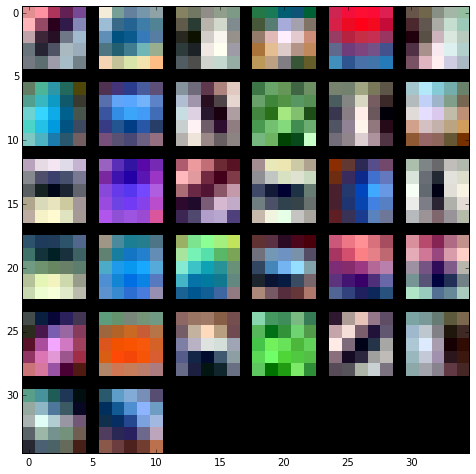

In [6]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(best_model_sf['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))

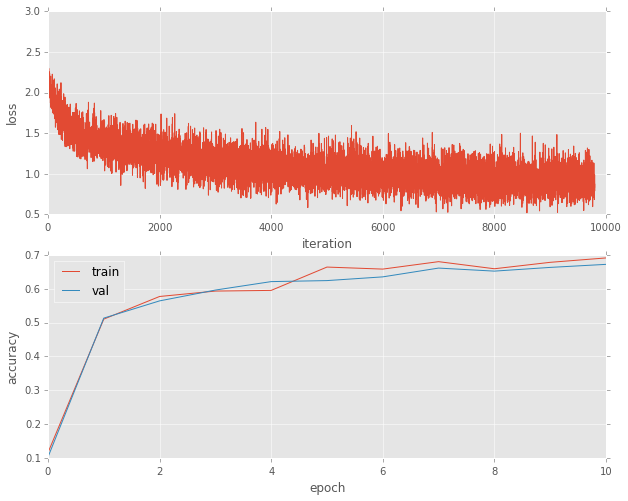

In [8]:
# is good
with plt.style.context(('ggplot')):
    plt.subplot(2, 1, 1)
    plt.plot(loss_history_sf)
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(train_acc_history_sf)
    plt.plot(val_acc_history_sf)
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
plt.show()

#Svm

In [9]:
model = init_three_layer_convnet()
trainer = ClassifierTrainer()
best_model_svm, loss_history_svm, train_acc_history_svm, val_acc_history_svm = trainer.train(
          X_train, y_train, X_val, y_val, model, three_layer_convnet,update='rmsprop',
          reg=0.001, m='svm', learning_rate=0.0001, batch_size=50, num_epochs=10,
          verbose=True)

starting iteration  0
Finished epoch 0 / 10: cost 8.999736, train: 0.101000, val 0.107000, lr 1.000000e-04
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
starting iteration  100
starting iteration  110
starting iteration  120
starting iteration  130
starting iteration  140
starting iteration  150
starting iteration  160
starting iteration  170
starting iteration  180
starting iteration  190
starting iteration  200
starting iteration  210
starting iteration  220
starting iteration  230
starting iteration  240
starting iteration  250
starting iteration  260
starting iteration  270
starting iteration  280
starting iteration  290
starting iteration  300
starting iteration  310
starting iteration  320
starting iteration  330
starting iteration  340
starting iteration  350
starting iteration  360
starting iteration  370
starting itera

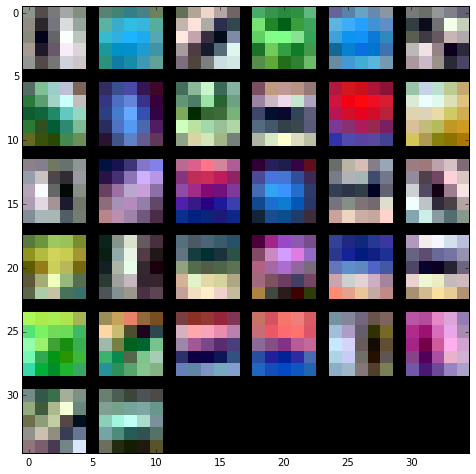

In [9]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(best_model_svm['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))

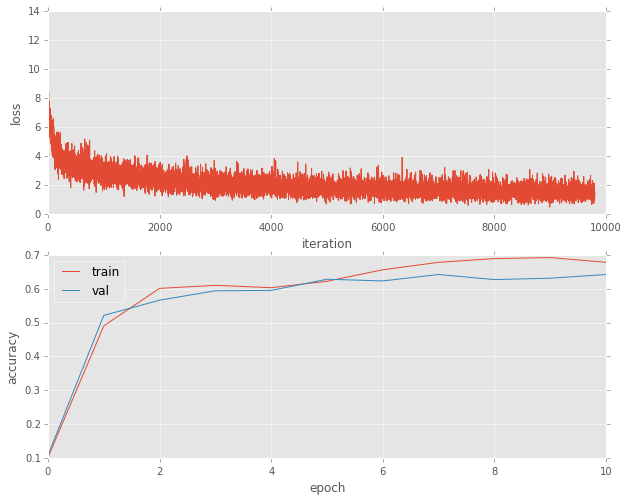

In [12]:
# is good
with plt.style.context(('ggplot')):
    plt.subplot(2, 1, 1)
    plt.plot(loss_history_svm)
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(train_acc_history_svm)
    plt.plot(val_acc_history_svm)
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
plt.show()

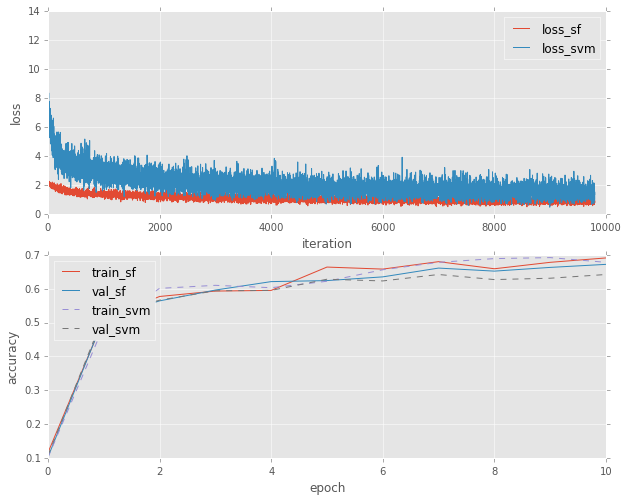

In [15]:
# is good
with plt.style.context(('ggplot')):
    plt.subplot(2, 1, 1)
    plt.plot(loss_history_sf)
    plt.plot(loss_history_svm)
    plt.legend(['loss_sf','loss_svm'],loc='upper right')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(train_acc_history_sf,'-')
    plt.plot(val_acc_history_sf,'-')
    plt.plot(train_acc_history_svm,'--')
    plt.plot(val_acc_history_svm,'--')
    plt.legend(['train_sf', 'val_sf','train_svm','val_svm'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
plt.show()

# 再迭代10 epoch  Softmax -----------------------------------

基于ConvNet + Softmax 10 epoch后的best_model_sf

In [5]:
trainer = ClassifierTrainer()
best_model, loss_history, train_acc_history, val_acc_history = trainer.train(
          X_train, y_train, X_val, y_val, best_model_sf, three_layer_convnet,update='rmsprop',
          reg=0.001, m='softmax', learning_rate=5e-05, batch_size=50, num_epochs=10,
          verbose=True)

starting iteration  0
Finished epoch 0 / 10: cost 1.006733, train: 0.548000, val 0.536000, lr 5.000000e-05
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
starting iteration  100
starting iteration  110
starting iteration  120
starting iteration  130
starting iteration  140
starting iteration  150
starting iteration  160
starting iteration  170
starting iteration  180
starting iteration  190
starting iteration  200
starting iteration  210
starting iteration  220
starting iteration  230
starting iteration  240
starting iteration  250
starting iteration  260
starting iteration  270
starting iteration  280
starting iteration  290
starting iteration  300
starting iteration  310
starting iteration  320
starting iteration  330
starting iteration  340
starting iteration  350
starting iteration  360
starting iteration  370
starting itera

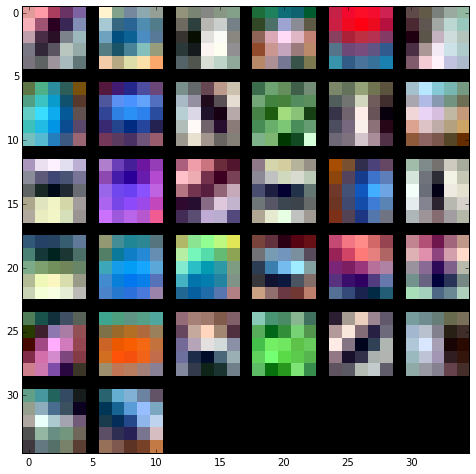

In [6]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(best_model['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))

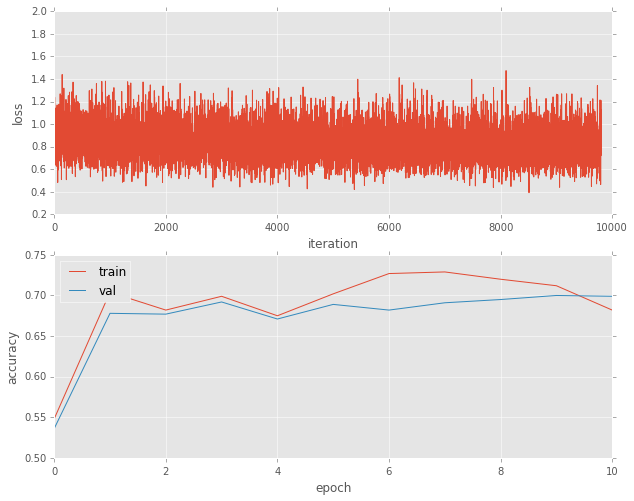

In [7]:
# is good
with plt.style.context(('ggplot')):
    plt.subplot(2, 1, 1)
    plt.plot(loss_history)
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(train_acc_history)
    plt.plot(val_acc_history)
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
plt.show()

In [9]:
save_params("softmax_2",best_model)
save_params("loss_sf2",loss_history)
save_params("ta_sf2",train_acc_history)
save_params("va_sf2",val_acc_history)

跟前10epoch 拼接在一起

In [11]:
loss_history_sf = load_saved_params("loss_sf")
train_acc_history_sf = load_saved_params("ta_sf")
val_acc_history_sf = load_saved_params("va_sf")

In [12]:
lh = loss_history_sf + loss_history
ta = train_acc_history_sf + train_acc_history
va = val_acc_history_sf + val_acc_history

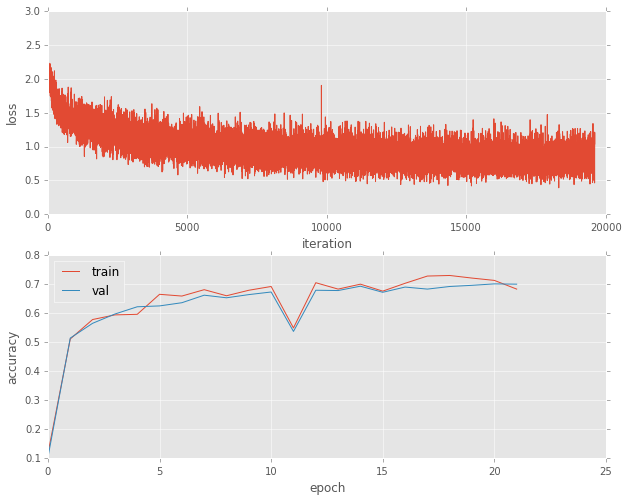

In [13]:
# is good
with plt.style.context(('ggplot')):
    plt.subplot(2, 1, 1)
    plt.plot(lh)
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(ta)
    plt.plot(va)
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
plt.show()

#再迭代10epoch  SVM--------------------------

In [15]:
trainer = ClassifierTrainer()
best_model, loss_history, train_acc_history, val_acc_history = trainer.train(
          X_train, y_train, X_val, y_val, best_model, three_layer_convnet,update='rmsprop',
          reg=0.001, m='svm', learning_rate=5e-05, batch_size=50, num_epochs=10,
          verbose=True)

starting iteration  0
Finished epoch 0 / 10: cost 1.577209, train: 0.566000, val 0.542000, lr 5.000000e-05
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
starting iteration  100
starting iteration  110
starting iteration  120
starting iteration  130
starting iteration  140
starting iteration  150
starting iteration  160
starting iteration  170
starting iteration  180
starting iteration  190
starting iteration  200
starting iteration  210
starting iteration  220
starting iteration  230
starting iteration  240
starting iteration  250
starting iteration  260
starting iteration  270
starting iteration  280
starting iteration  290
starting iteration  300
starting iteration  310
starting iteration  320
starting iteration  330
starting iteration  340
starting iteration  350
starting iteration  360
starting iteration  370
starting itera

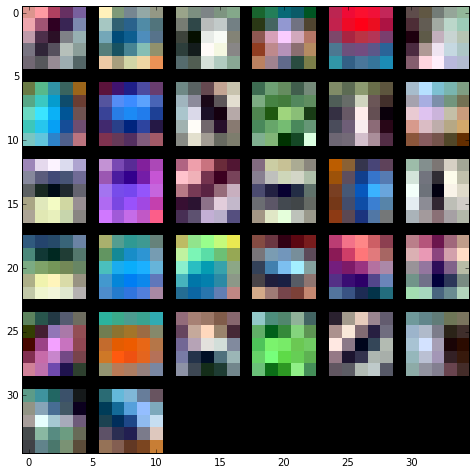

In [16]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(best_model['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))

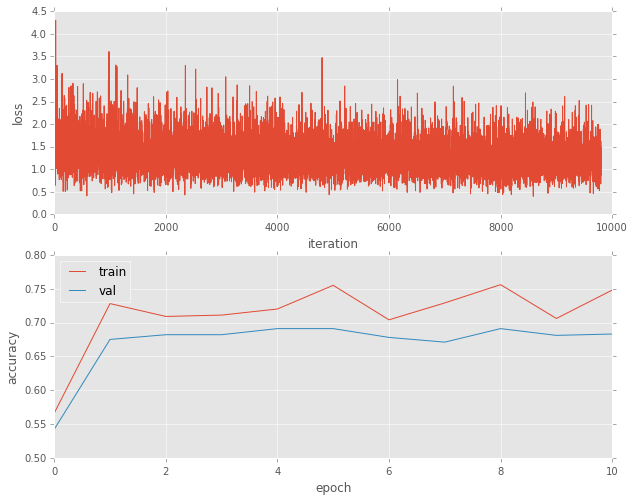

In [17]:
# is good
with plt.style.context(('ggplot')):
    plt.subplot(2, 1, 1)
    plt.plot(loss_history)
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(train_acc_history)
    plt.plot(val_acc_history)
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
plt.show()

In [18]:
save_params("svm_2",best_model)
save_params("loss_svm2",loss_history)
save_params("ta_svm2",train_acc_history)
save_params("va_svm2",val_acc_history)

跟前10epoch 拼接在一起

In [19]:
loss_history_svm = load_saved_params("loss_svm")
train_acc_history_svm = load_saved_params("ta_svm")
val_acc_history_svm = load_saved_params("va_svm")

In [20]:
lh_svm = loss_history_svm + loss_history
ta_svm = train_acc_history_svm + train_acc_history
va_svm = val_acc_history_svm + val_acc_history

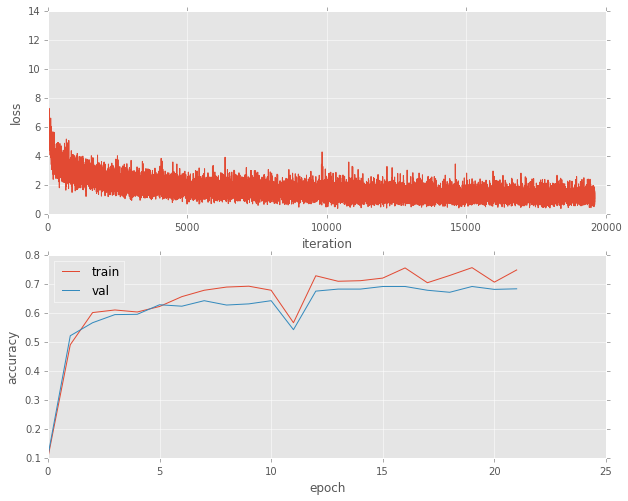

In [21]:
# is good
with plt.style.context(('ggplot')):
    plt.subplot(2, 1, 1)
    plt.plot(lh_svm)
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(ta_svm)
    plt.plot(va_svm)
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
plt.show()

#Save Parameters 

In [8]:
import cPickle as pickle
def save_params(name,params):
    with open(name + "saved_params.npy", "w") as f:
        pickle.dump(params, f)

In [20]:
save_params("softmax", best_model_sf)
save_params("svm",best_model_svm)
save_params("loss_sf",loss_history_sf)
save_params("loss_svm",loss_history_svm)
save_params("ta_sf",train_acc_history_sf)
save_params("va_sf",val_acc_history_sf)
save_params("ta_svm",train_acc_history_svm)
save_params("va_svm",val_acc_history_svm)

#Load Parameters

In [10]:
import cPickle as pickle


def load_saved_params(name):
    """ A helper function that loads previously saved parameters and resets iteration start """
    with open(name + "saved_params.npy", "r") as f:
        params = pickle.load(f)
    return params

In [14]:
best_model_svm = load_saved_params("svm")
# best_model_sf = load_saved_params("softmax")

In [23]:
idxs = np.flatnonzero(y_train == 1)
idxs = np.random.choice(idxs,2,replace=False)
sam = X_train[idxs]
print sam.shape

(2L, 3L, 32L, 32L)


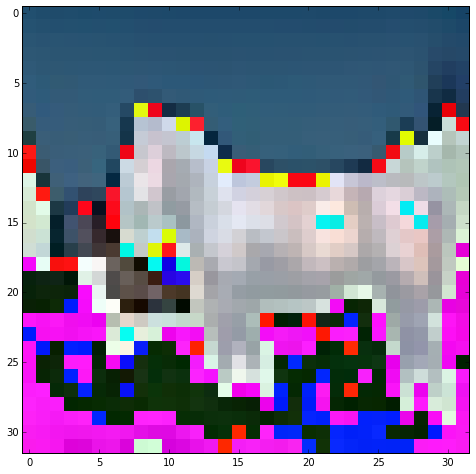

In [12]:
# plt.imshow(X_train[12].transpose(1,2,0).astype('uint8'))

In [24]:
a1 = three_layer_convnet(sam,best_model_sf,first_conv=True)

In [26]:
print a1.shape
pic = a1[1]
print pic.shape
print y_train[idxs]

(2L, 32L, 16L, 16L)
(32L, 16L, 16L)
[1 1]


IndexError: index 32 is out of bounds for axis 0 with size 32

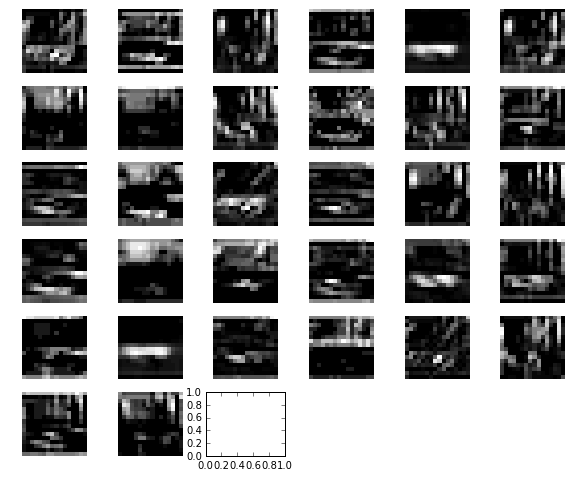

In [28]:
for i in xrange(6):
    for j in xrange(1,7):
        plt_idx = i*6 + j
        plt.subplot(6,6,plt_idx)
        plt.imshow(pic[plt_idx-1].astype('uint8'))
        plt.axis('off')
plt.show()

# Testing 10 epoch

In [12]:
scores_test = three_layer_convnet(X_test.transpose(0, 3, 1, 2), best_model_sf)
print 'Test accuracy using ConvNet+softmax: ', np.mean(np.argmax(scores_test, axis=1) == y_test)

Test accuracy using ConvNet+softmax:  0.669


In [13]:
scores_test = three_layer_convnet(X_test.transpose(0, 3, 1, 2), best_model_svm)
print 'Test accuracy using ConvNet+softmax: ', np.mean(np.argmax(scores_test, axis=1) == y_test)

Test accuracy using ConvNet+svm:  0.644


# load 20 epoch params

In [22]:
best_model_svm_ = load_saved_params("svm_2")
best_model_sf_ = load_saved_params("softmax_2")

#Testing 20 epoch

In [23]:
scores_test = three_layer_convnet(X_test.transpose(0, 3, 1, 2), best_model_sf_)
print 'Test accuracy using ConvNet+softmax 20 epoch: ', np.mean(np.argmax(scores_test, axis=1) == y_test)

Test accuracy using ConvNet+softmax 20 epoch:  0.673


In [24]:
scores_test = three_layer_convnet(X_test.transpose(0, 3, 1, 2), best_model_svm_)
print 'Test accuracy using ConvNet+svm 20 epoch: ', np.mean(np.argmax(scores_test, axis=1) == y_test)

Test accuracy using ConvNet+svm 20 epoch:  0.663


# boosted 10 epoch

In [5]:
scores1 = three_layer_convnet(X_test.transpose(0, 3, 1, 2), best_model_sf)
scores2 = three_layer_convnet(X_test.transpose(0, 3, 1, 2), best_model_svm)
scores = scores1 + scores2
print 'ensemble softmax+svm: ', np.mean(np.argmax(scores, axis=1) == y_test)

ensemble softmax+svm:  0.685


#boosted 20 epoch

In [25]:
scores1 = three_layer_convnet(X_test.transpose(0, 3, 1, 2), best_model_sf_)
scores2 = three_layer_convnet(X_test.transpose(0, 3, 1, 2), best_model_svm_)
scores = scores1 + scores2
print 'ensemble softmax+svm 20 epoch: ', np.mean(np.argmax(scores, axis=1) == y_test)

ensemble softmax+svm 20 epoch:  0.681


# other layers

其他层好像不能可视化权值，因为有些num_filters !=3

In [3]:
model = init_three_layer_convnet(num_filters=3)
trainer = ClassifierTrainer()
best_model_sf, loss_history_sf, train_acc_history_sf, val_acc_history_sf = trainer.train(
          X_train, y_train, X_val, y_val, model, three_layer_convnet,update='rmsprop',
          reg=0.001, m='softmax', learning_rate=0.0001, batch_size=50, num_epochs=1,
          verbose=True)

starting iteration  0
Finished epoch 0 / 1: cost 2.302586, train: 0.085000, val 0.094000, lr 1.000000e-04
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
starting iteration  100
starting iteration  110
starting iteration  120
starting iteration  130
starting iteration  140
starting iteration  150
starting iteration  160
starting iteration  170
starting iteration  180
starting iteration  190
starting iteration  200
starting iteration  210
starting iteration  220
starting iteration  230
starting iteration  240
starting iteration  250
starting iteration  260
starting iteration  270
starting iteration  280
starting iteration  290
starting iteration  300
starting iteration  310
starting iteration  320
starting iteration  330
starting iteration  340
starting iteration  350
starting iteration  360
starting iteration  370
starting iterat

In [4]:
from cs231n.vis_utils import visualize_grid

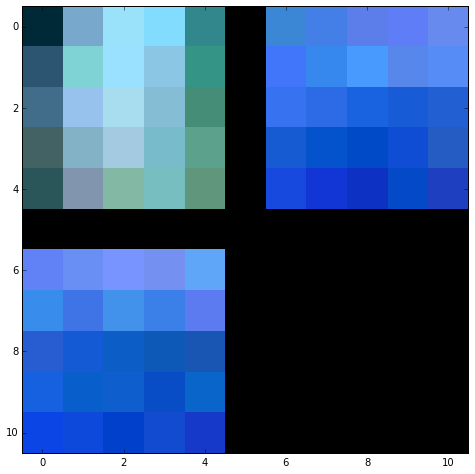

In [8]:
grid = visualize_grid(best_model_sf['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))